## Graphiques isochrones : quel niveau d'accessibilité depuis la ville de Cournon d'Auvergne avec le réseau T2C ?

### Création du graphe

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely import Point, LineString, Polygon
from shapely import MultiLineString, MultiPoint

from expreseau_gtfs.graphes import graphes
from expreseau_gtfs.feed import gtfs_feed
import warnings; warnings.filterwarnings("ignore")


fic = r"C:\Users\Lucas\Documents\DONNEES\GTFS\t2c\gtfs-t2c_plus_scolaire.zip"
date = '20240305'
ph = [7,9]

Feed = gtfs_feed(gtfs_path=fic,
                date=date,
                plage_horaire=ph)

trips_minus = Feed.trips
routes_minus = Feed.routes

trips_minus = trips_minus.merge(routes_minus[['route_id', "route_short_name"]], on = "route_id")
# trips_minus
liste_lignes = ['41', '60', '62', '63', '65',
'66', '67', '68', '69', '70', '71', '73', '75', '76', '77', '78', '79',
'80', '82', '83', '42', '84', '85', '362', '61', "scolaire"]

trips_minus = trips_minus[~trips_minus.route_short_name.isin(liste_lignes)]

Feed.trips = trips_minus[["trip_id","service_id","route_id","trip_headsign","direction_id","shape_id"]]

graphe = graphes(Feed=Feed)
G = graphe.gtfs_to_nx(verbose = True, distance = 300, MALUS = 5) 


création du graphe directionnel
chargement des arrêts uniques
ajout des noeuds au graphes
chargement des segments
ajout des connexions piétonnes


### Calcul des isochrones

In [59]:
coords[coords.route_short_name=="C"].stop_name.unique()

array(['Ampère', 'Anne-Marie Menut', "Av. de l'Allier", 'Av. du Pont',
       'Beaurepaire', 'Berthelot', 'COURNON J. Gardet',
       'COURNON Lycée Descartes', 'Chambre de Commerce',
       'Croix des Vignes', 'Delille Trudaine', 'Dômes', 'Ernest Cristal',
       'Esplanade', 'F. Roosevelt', 'Foirail', 'Fournières', 'Gardes',
       'Goncourt', 'La Pardieu', 'La Pardieu Gare', 'Lac', 'Limousin',
       'Livradois', 'Maison de la Culture', 'Monteix', 'Mozart', 'Oradou',
       'Pasteur Gilbert', 'Pointe de Cournon', 'Pont de Naud',
       'Pont de Sarliève', 'Port Royal', 'Quatre Routes',
       'Rassat Courtiaux', 'Raye Dieu', 'Sablon Carnot',
       'Sablon Lafayette', 'Sacré Coeur', 'Salins Pasteur', 'Tamaris',
       'UCA - Campus Centre', 'Victor Hugo'], dtype=object)

In [60]:
coords = graphe.table_noeuds()
coords[coords.stop_name == "COURNON Lycée Descartes"]

,stop_name,stop_id,route_short_name,x,y,headway
217,COURNON Lycée Descartes,3377704015495467_34,34,716347.062782,6.515956e+06,50.000000
218,COURNON Lycée Descartes,3377704015495467_C,C,716347.062782,6.515956e+06,12.769231
219,COURNON Lycée Descartes,3377704015495468_34,34,716340.035357,6.515967e+06,50.000000
220,COURNON Lycée Descartes,3377704015495468_C,C,716340.035357,6.515967e+06,11.769231


In [8]:
print(graphe.isochrones.__doc__)


        Créé des isochrones de couplage marche à pied + transports en commun à 
        partir d'un arrêt choisi.
        ----------
        Args : 
         - graph : graphe directionnel networkx 
         - source : id de l'arrêt de départ
         - temps_secondes : liste d'entiers des limites des isochrones. Par défaut : [300,900,1800]
         - labels : liste de strings des labels des isochrones. Par défaut : ['5min', '15min', '30min']
         - crs : crs des tracés. Par défaut : "epsg:2154".
        -------
        Returns :
         - geodataframe geopandas
        


In [61]:
iso = graphe.isochrones(G, "3377704015495467_C", temps_secondes=[300,600,900,1800, 2400, 3600],
                        labels=["5m","10m","15m","30m", "40m", "1H"])

In [62]:
iso.sort_index(ascending = False).explore(column = "isochrone", style_kwds={"weight":2}, cmap = "turbo_r") 

capture d'écran du résultat : 

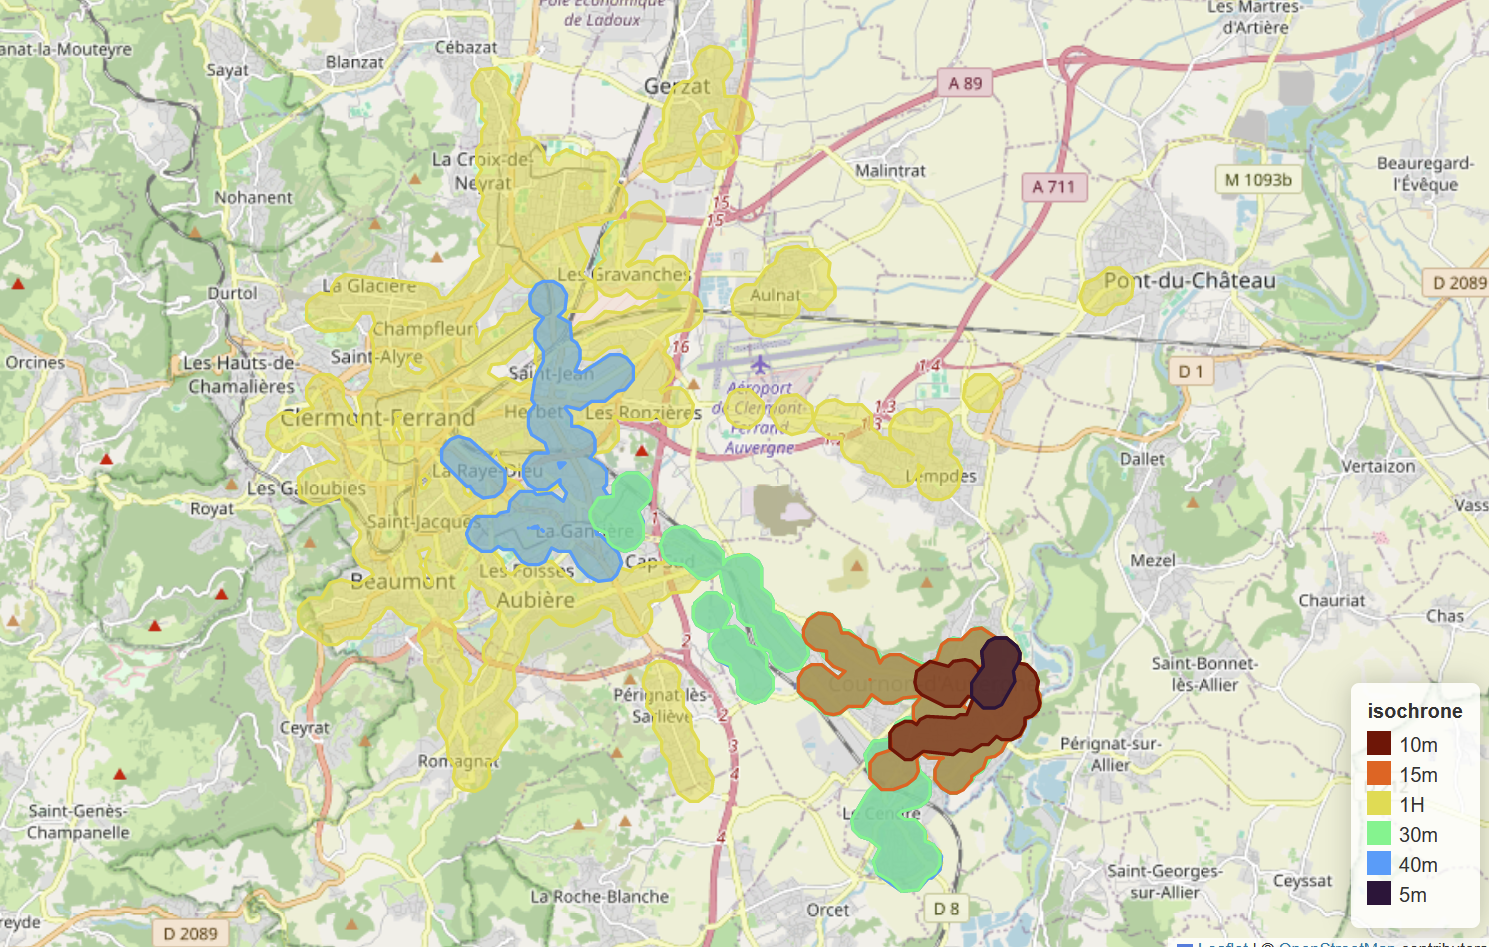